In [1]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
from matplotlib.lines import Line2D
import math

sys.path.append(str(Path("..").resolve()))
from src import *

# Metric Visualizer [DCT]

In [2]:
def plot(file, use_lims=True, show_baseline=True):
    df = pd.read_csv(file, index_col="suffx")
    baseline = df.loc["deepcad"]
    df = df.drop(index="deepcad")

    _, ax1 = plt.subplots(figsize=(18, 10))
    ax1.set_title("FFT Metrics")
    ax1.tick_params(axis="x", labelrotation=90)

    ax1.plot(df.index, df["PSNR"], marker="o", markersize=8, color="tab:blue", label="PSNR", linewidth=3)
    ax1.set_ylabel("PSNR (dB)")

    ax2 = ax1.twinx()
    ax2.plot(df.index, df["SSIM"], marker="s", markersize=8, linewidth=3, color="tab:orange", label="SSIM")
    ax2.set_ylabel("SSIM")

    if use_lims:
        y11, y12 = ax1.get_ylim()
        y11 = math.floor(y11)
        y12 = math.ceil(y12)
        ax1.set_yticks(np.linspace(y11, y12, 10),[f"{_:.1f}" for _ in np.linspace(y11, y12, 10)])

        y21, y22 = ax2.get_ylim()
        y21 = math.floor(y21 * 10) / 10
        y22 = math.ceil(y22 * 10) / 10
        ax2.set_yticks(np.linspace(y21, y22, 10),[f"{_:.2f}" for _ in np.linspace(y21, y22, 10)])

    if show_baseline:
        ax1.add_line(Line2D([0, len(df)], [baseline.PSNR] * 2, linestyle="--", linewidth=3, color="tab:blue"))
        ax2.add_line(Line2D([0, len(df)], [baseline.SSIM] * 2, linestyle="--", linewidth=3, color="tab:orange"))

    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax1.legend(h1 + h2, l1 + l2, loc="lower right")
    plt.tight_layout()
    plt.show()
    cprint("Max PSNR=", f"cyan:{df['PSNR'].max():.2f}", "Max SSIM=", f"light_red:{df['SSIM'].max():.2f}")

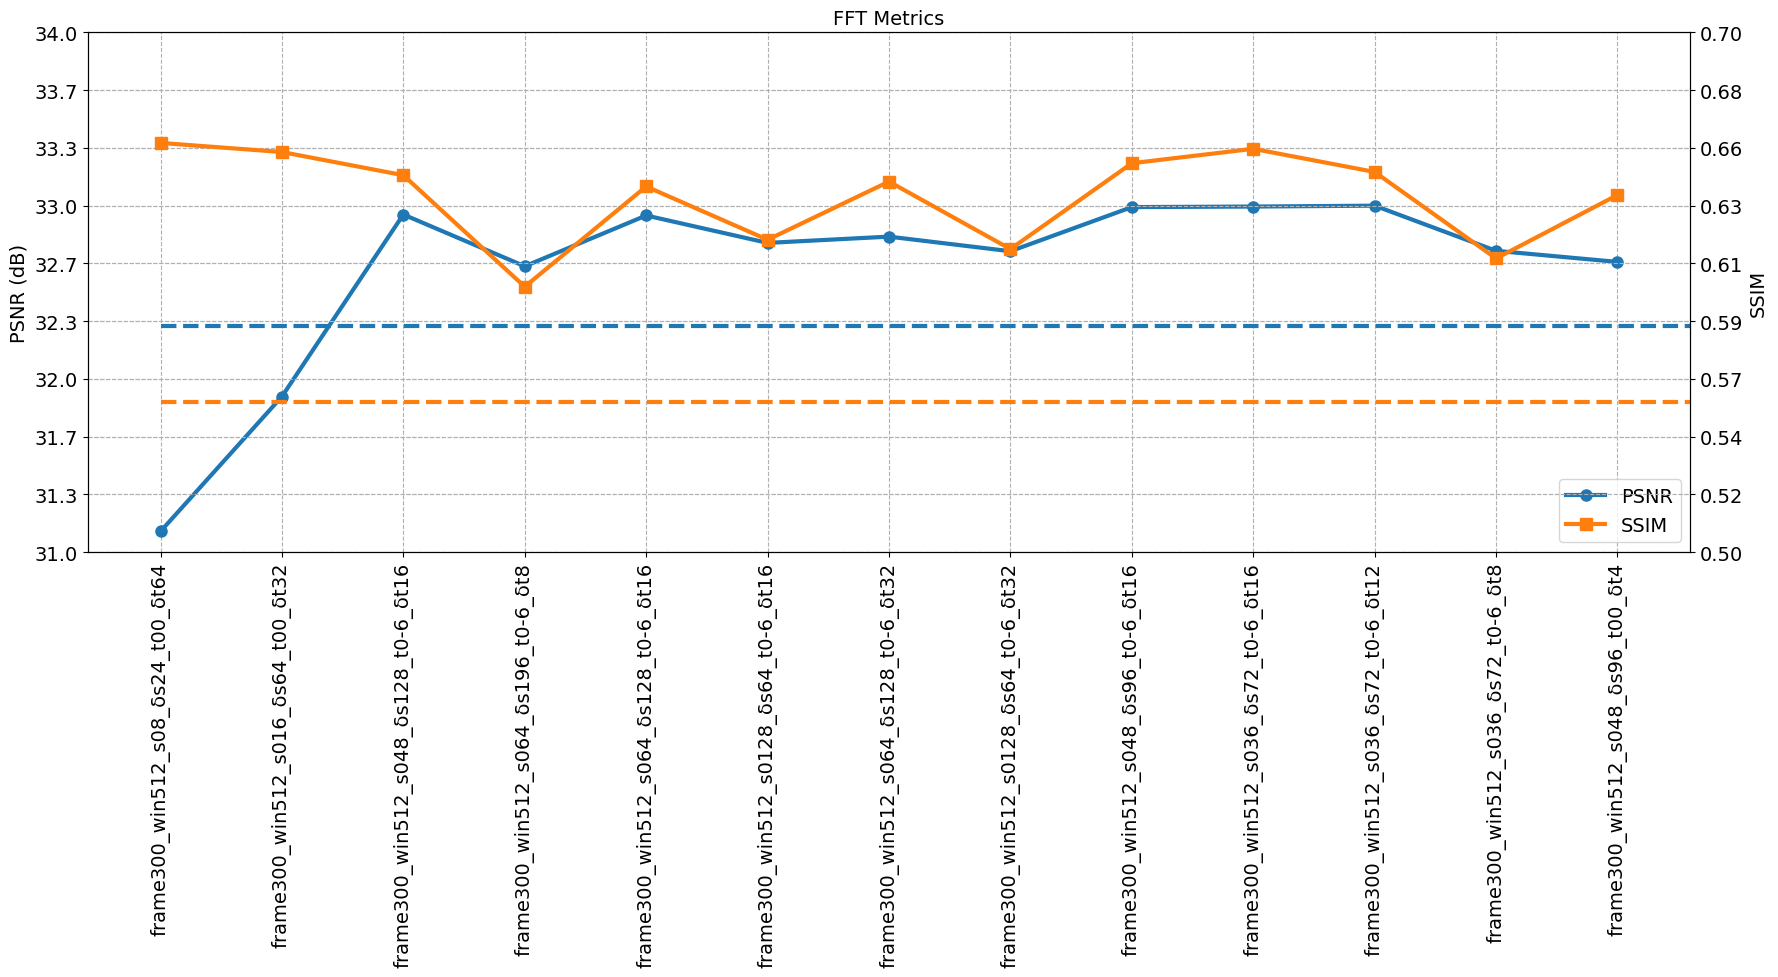

Max PSNR= 33.00 Max SSIM= 0.66


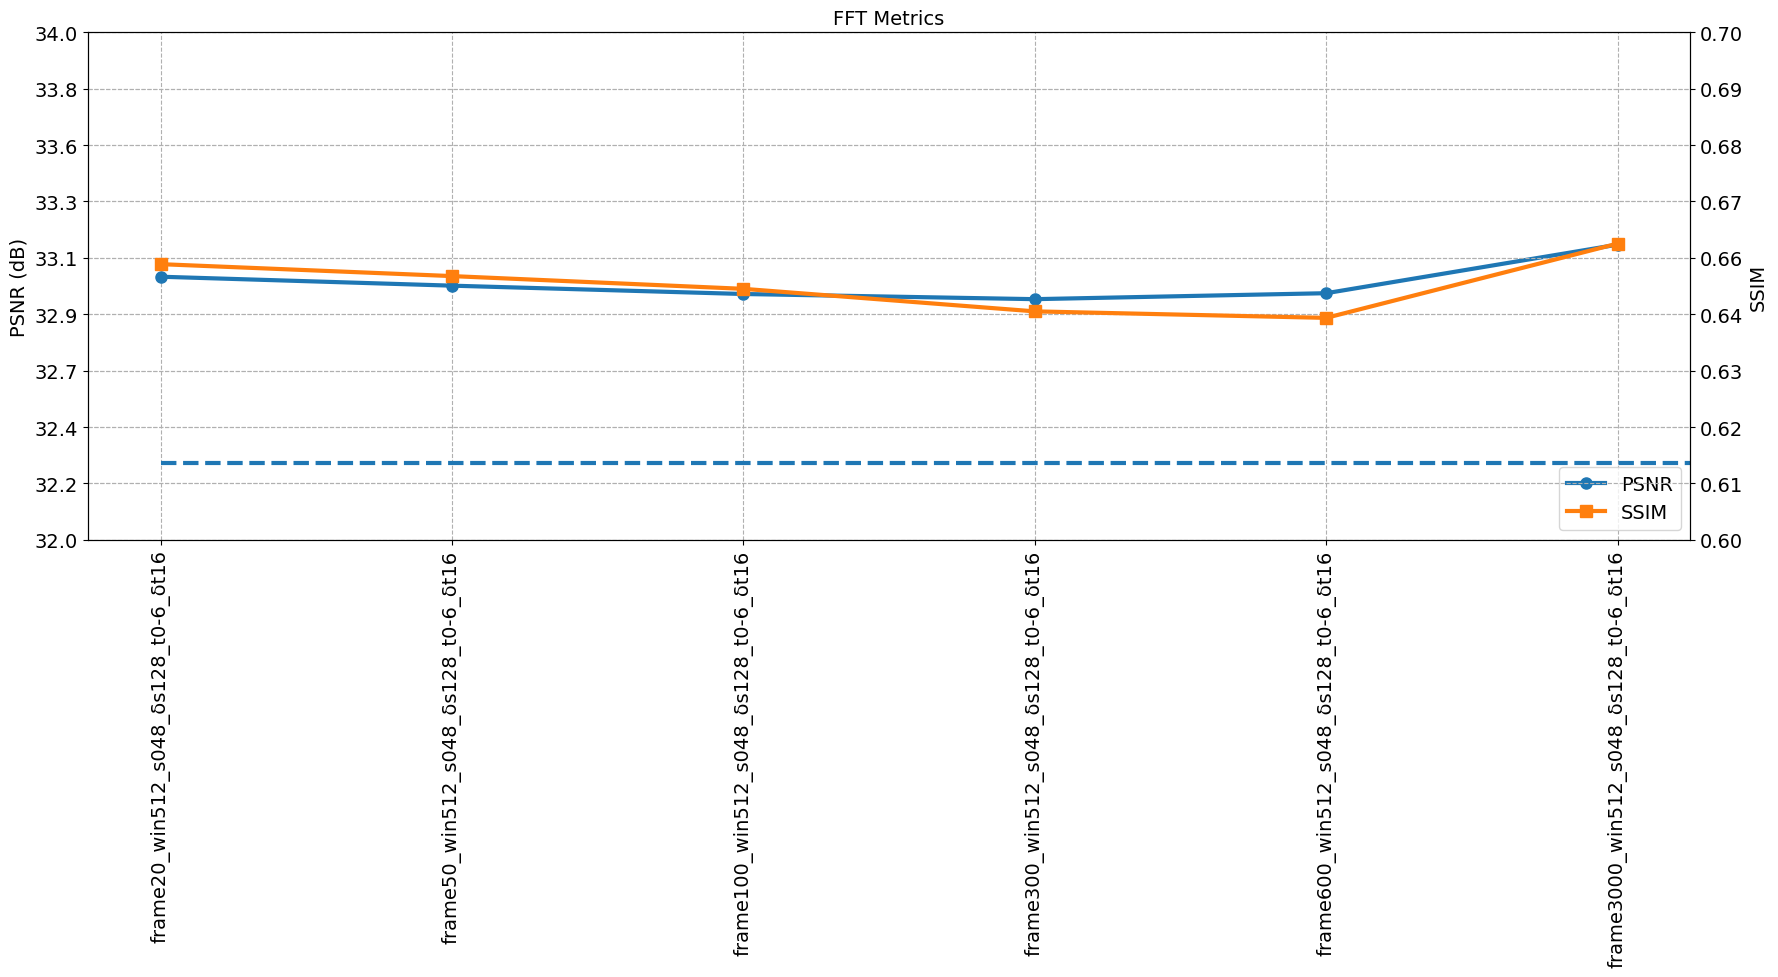

Max PSNR= 33.16 Max SSIM= 0.66


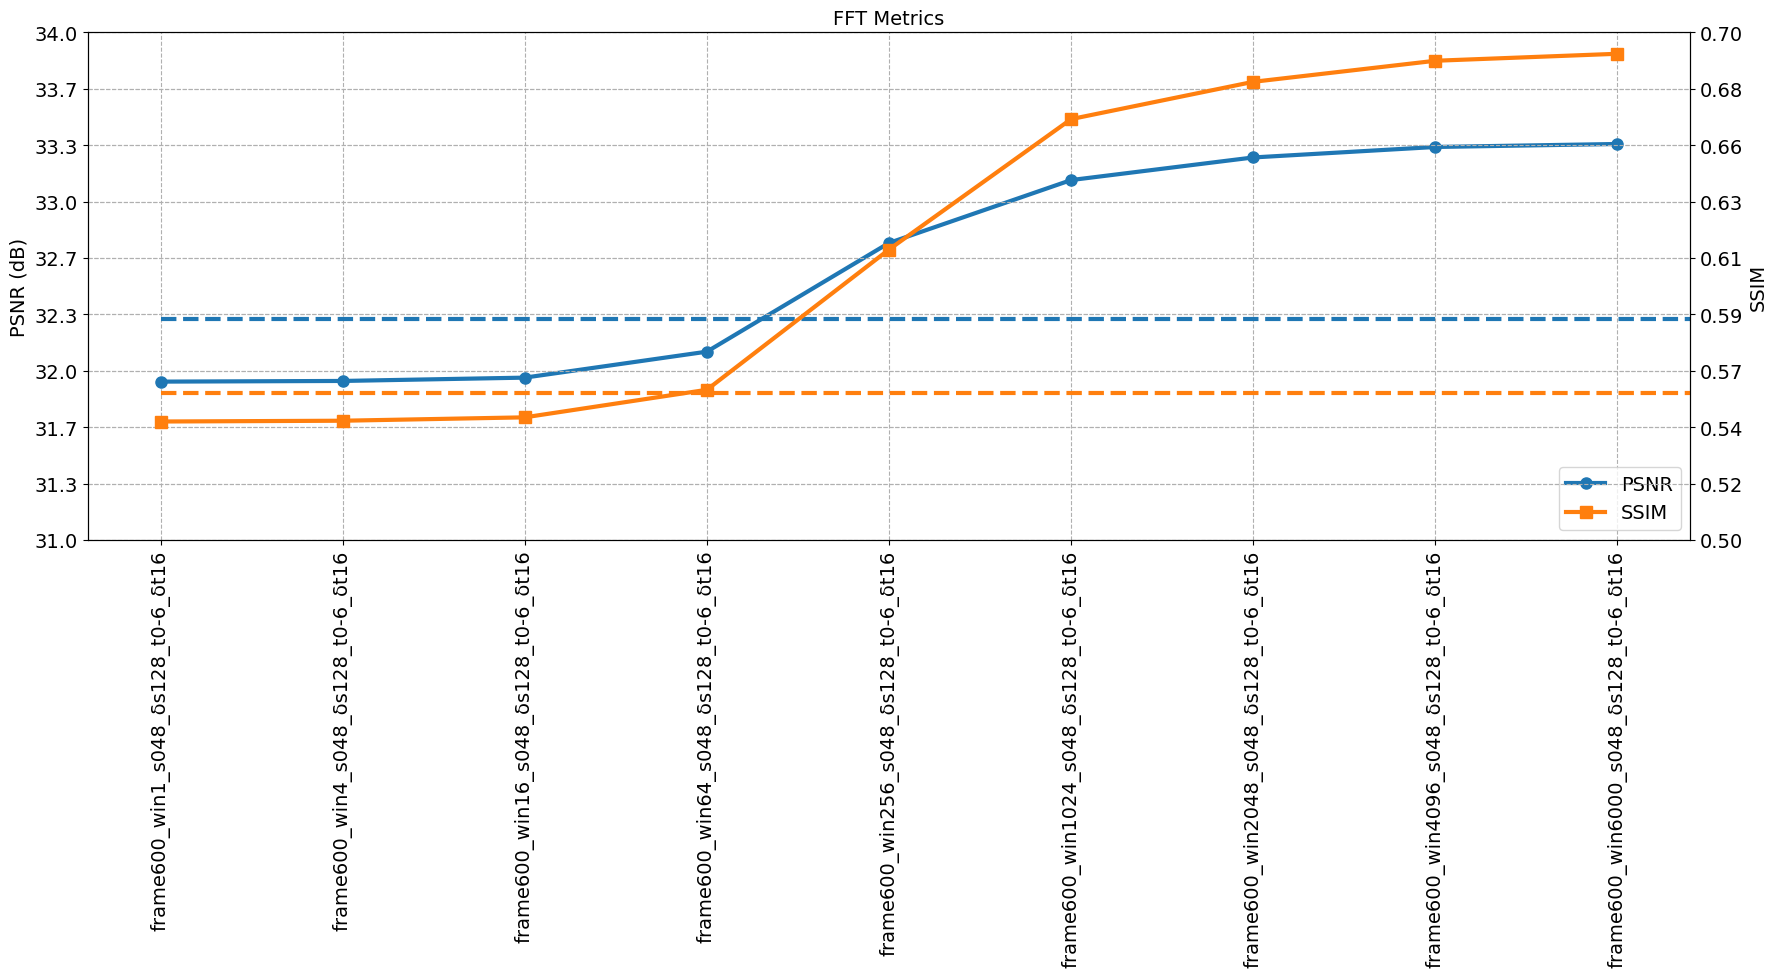

Max PSNR= 33.34 Max SSIM= 0.69


In [3]:
plot("dct_syntethic_metrics_weights.csv")
plot("dct_syntethic_metrics_frames.csv")
plot("dct_syntethic_metrics_avgs.csv")